# Import

In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
from scipy import integrate

In [43]:
import Fedeli_1_Copy1 as Fedeli
Fedeli.__all__

('Initialiser_SAM',
 'StellarProfile',
 'GasProfile',
 'CDMProfile',
 'SAM_Profile')

In [31]:
import BCMprofiles_hopefulFinal_Copy1 as BCMprofiles
BCM.__all__

('Initialiser',
 'StellarProfile',
 'EjectedGasProfile',
 'BoundGasProfile',
 'CDMProfile',
 'BCMProfile')

# Set up parameters

In [25]:
### Set up eg- cosmo
trial_mass_def = ccl.halos.MassDef200c #hmd_200c # use a mass definition with Delta = 200
trial_concentration = ccl.halos.ConcentrationDuffy08(mass_def=trial_mass_def) # mass_def=hmd_200c) # cM
trial_cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)

trial_gamma = 1.2 
# The Tinker 2008 mass function
# hmf_200m = ccl.halos.MassFuncTinker08(mass_def=hmd_200m, mass_def_strict=False)
trial_mass_function = ccl.halos.MassFuncTinker08(mass_def=trial_mass_def, mass_def_strict=False)

trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_k = np.geomspace(1E-2,9E1,100000) # np.geomspace(1E-3,1E2,100000)
trial_M = np.array([3E12,6E13, 1E14])#/cosmo['h'] # trying with factor of h^{-1}

## Set up profiles

### BCM

In [33]:
bcm_cdm_profile = BCMprofiles.CDMProfile(trial_cosmo, trial_mass_def, trial_concentration, trial_gamma)
bcm_stel_profile = BCMprofiles.StellarProfile(trial_cosmo, trial_mass_def, trial_concentration, trial_gamma)
bcm_ej_profile = BCMprofiles.EjectedGasProfile(trial_cosmo, trial_mass_def, trial_concentration, trial_gamma)
bcm_bd_profile = BCMprofiles.BoundGasProfile(trial_cosmo, trial_mass_def, trial_concentration, trial_gamma)
bcm_profile = BCMprofiles.BCMProfile(trial_cosmo, trial_mass_def, trial_concentration, trial_gamma)

In [35]:
bcm_cdm_real = bcm_cdm_profile._real(trial_cosmo, trial_r, trial_M)
bcm_stel_real = bcm_stel_profile._real(trial_cosmo, trial_r, trial_M)
bcm_ej_real = bcm_ej_profile._real(trial_cosmo, trial_r, trial_M)
bcm_bd_real = bcm_bd_profile._real(trial_cosmo, trial_r, trial_M)
bcm_real = bcm_profile._real(trial_cosmo, trial_r, trial_M)

In [37]:
bcm_cdm_fourier = bcm_cdm_profile._fourier(trial_k, trial_M)
bcm_stel_fourier = bcm_stel_profile._fourier(trial_k, trial_M)
bcm_ej_fourier = bcm_ej_profile._fourier(trial_k, trial_M)
bcm_bd_fourier = bcm_bd_profile._fourier(trial_k, trial_M)
bcm_fourier = bcm_profile._fourier(trial_k, trial_M)

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through
Qany = 64.1% through
Qany = 65.6% through
Qany = 67.2% through
Qany = 68.8% through
Qany = 70.3% through
Qany = 71.9% through
Qany = 73.4% through
Qany = 75% throug

### Fedeli

In [45]:
fed_cdm_profile = Fedeli.CDMProfile(trial_cosmo, trial_mass_def, trial_mass_function, trial_concentration)
fed_stel_profile = Fedeli.StellarProfile(trial_cosmo, trial_mass_def, trial_mass_function, trial_concentration)
fed_gas_profile = Fedeli.GasProfile(trial_cosmo, trial_mass_def, trial_mass_function, trial_concentration)
fed_profile = Fedeli.SAM_Profile(trial_cosmo, trial_mass_def, trial_mass_function, trial_concentration)

In [53]:
fed_cdm_real = fed_cdm_profile._real(trial_cosmo, trial_r, trial_M)
fed_stel_real = fed_stel_profile._real(trial_cosmo, trial_r, trial_M)
fed_gas_real = fed_gas_profile._real(trial_cosmo, trial_r, trial_M)
fed_real = fed_profile._real(trial_cosmo, trial_r, trial_M)

In [57]:
fed_cdm_fourier = fed_cdm_profile._fourier(trial_k, trial_M)
fed_stel_fourier = fed_stel_profile.fourier(trial_cosmo, trial_k, trial_M, 1)  # (cosmo, k, M, a)
                                                            # stellar: implement analytical Fourier profile (option for alpha=1)
fed_gas_fourier = fed_gas_profile._fourier(trial_k, trial_M)
fed_fourier = fed_profile._fourier(trial_k, trial_M)

## Call Fractions & Check Normalisations

In [113]:
print(f'For BCM\nf_cdm = {bcm_profile.f_c}')
print(f'f_* = {bcm_profile._f_bd(trial_M)[1]}') 
print(f'f_bd = {bcm_profile._f_bd(trial_M)[0]}') # f_bd, then f_stell
print(f'f_ej = {bcm_profile.f_bar_b - bcm_profile._f_bd(trial_M)[1] - bcm_profile._f_bd(trial_M)[0]}') 
print(f'f_gas = {bcm_profile.f_bar_b - bcm_profile._f_bd(trial_M)[1]}')

print(f'\nFor SAM (Fedeli 2014)\nf_cdm = {fed_profile.f_c}')
print(f'f_* = {fed_stel_profile._f_stell(trial_M)}')  
print(f'f_gas = {fed_gas_profile._f_gas(trial_M)}')

For BCM
f_cdm = 0.8333333333333333
f_* = [0.02999455 0.01701254 0.013735  ]
f_bd = [0.02675169 0.08902999 0.10187381]
f_ej = [0.10992043 0.06062414 0.05105785]
f_gas = [0.13667212 0.14965413 0.15293167]

For SAM (Fedeli 2014)
f_cdm = 0.8333333333333333
f_* = [1.65322857e-06 1.29095978e-06 1.10064986e-06]
f_gas = [0.         0.12066112 0.13720273]


In [119]:
print('Should get:  $4 \\pi \\int^{\\infty}_0 r^2 g(r) dr = 1 $, when normalised by (respective) mass')
print('With BCM: \n')
print('bound: ', integrate.simpson(4*np.pi*(trial_r**2)*bcm_bd_real, x = trial_r)/(trial_M*bcm_profile._f_bd(trial_M)[0]))
print('stellar: ', integrate.simpson(4*np.pi*(trial_r**2)*bcm_stel_real, x = trial_r)/(trial_M*bcm_profile._f_bd(trial_M)[1]))
bcm_f_ej = bcm_profile.f_bar_b - bcm_profile._f_bd(trial_M)[1] - bcm_profile._f_bd(trial_M)[0]
print('ejected: ', integrate.simpson(4*np.pi*(trial_r**2)*bcm_ej_real, x = trial_r)/(trial_M*bcm_f_ej))
print('dark matter: ', integrate.simpson(4*np.pi*(trial_r**2)*bcm_cdm_real, x = trial_r)/(trial_M*bcm_profile.f_c))

#### Note: stellar is not correct, but this was already known about / matches previous behaviour

print('\nWith Fedeli 2014: \n')
print('gas: ', integrate.simpson(4*np.pi*(trial_r**2)*fed_gas_real, x = trial_r)/(trial_M*fed_profile._f_gas(trial_M)))
print('stellar: ', integrate.simpson(4*np.pi*(trial_r**2)*fed_stel_real, x = trial_r)/(trial_M*fed_profile._f_stell(trial_M)))
print('dark matter: ', integrate.simpson(4*np.pi*(trial_r**2)*fed_cdm_real, x = trial_r)/(trial_M*fed_profile.f_c))


Should get:  $4 \pi \int^{\infty}_0 r^2 g(r) dr = 1 $, when normalised by (respective) mass
With BCM: 

bound:  [0.97164942 0.97222681 0.97223498]
stellar:  [9.64514191e-10 9.64514191e-10 9.64514191e-10]
ejected:  [0.99999946 0.99999997 0.99999998]
dark matter:  [0.98616499 0.99842835 0.99902432]

With Fedeli 2014: 

gas:  [       nan 0.99976958 1.00000088]
stellar:  [0.69155736 0.93499203 0.95178626]
dark matter:  [0.98616499 0.99842835 0.99902432]


/var/folders/fj/p1qj16jj5pl9df1rgw6p12tc000vry/T/ipykernel_73485/4293038459.py:12: RuntimeWarning: invalid value encountered in divide
  print('gas: ', integrate.simpson(4*np.pi*(trial_r**2)*fed_gas_real, x = trial_r)/(trial_M*fed_profile._f_gas(trial_M)))


In [154]:
bcm_f_list = [np.full(len(trial_M), bcm_profile.f_c), bcm_profile._f_bd(trial_M)[1], bcm_f_ej, bcm_profile._f_bd(trial_M)[0], 
              np.full(len(trial_M), 1)] 
# [CDM, Stellar, Ejected Gas, Bound Gas, Total BCM]
fed_f_list = [fed_profile._f_stell(trial_M), fed_profile._f_gas(trial_M), np.full(len(trial_M), fed_profile.f_c), 
              np.full(len(trial_M), 1)] # [CDM, Gas, Stellar, Total]
# note: setting Total to 1 for the plots even though the Fedeli mass fractions don't add up to 1

# Plots

## BCM

In [158]:
titles_list = [' CDM ', ' Stellar ', ' Ejected Gas ', ' Bound Gas ', ' Total BCM ']
print('BCM', bcm_f_list)
#print('Fedeli', fed_f_list)

BCM [array([0.83333333, 0.83333333, 0.83333333]), array([0.02999455, 0.01701254, 0.013735  ]), array([0.10992043, 0.06062414, 0.05105785]), array([0.02675169, 0.08902999, 0.10187381]), array([1, 1, 1])]


### Rea

IndexError: index 1 is out of bounds for axis 0 with size 1

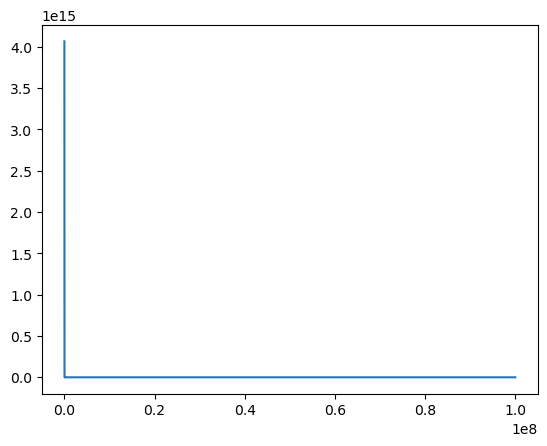

In [148]:
bcm_real_profiles = [bcm_cdm_real, bcm_stel_real, bcm_ej_real, bcm_bd_real, bcm_real]
for i, profile in enumerate(bcm_real_profiles):
    fraction = np.atleast_1d(bcm_f_list[i])
    for j, prof in enumerate(profile):
        plt.plot(trial_r, fraction[j]*prof, label=f'Mass: {trial_M[j]:.1g} $M \\odot$', zorder=len(profile)-j)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=12)
    plt.ylabel(r'$\rho(r)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
    plt.xlabel(r'$r\, \,[{\rm Mpc}]$', fontsize=15);
    plt.title('Real'+titles_list[i]+'Profile: Log-Log', fontsize=18);
    plt.figure();
    

### Fourier

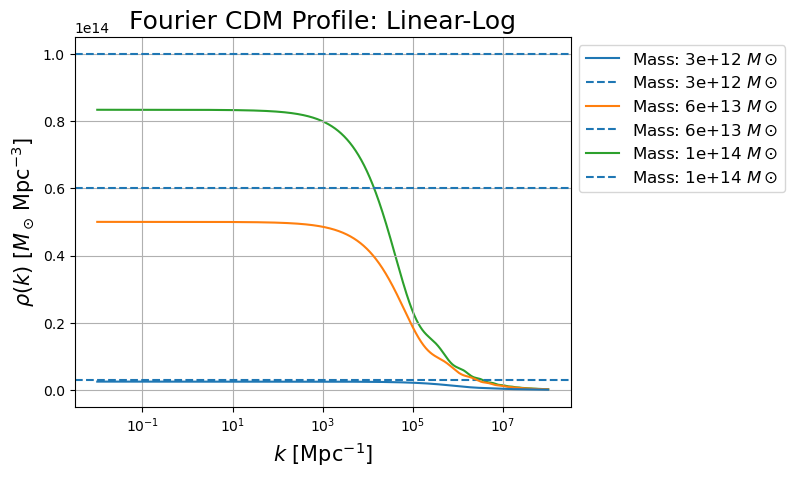

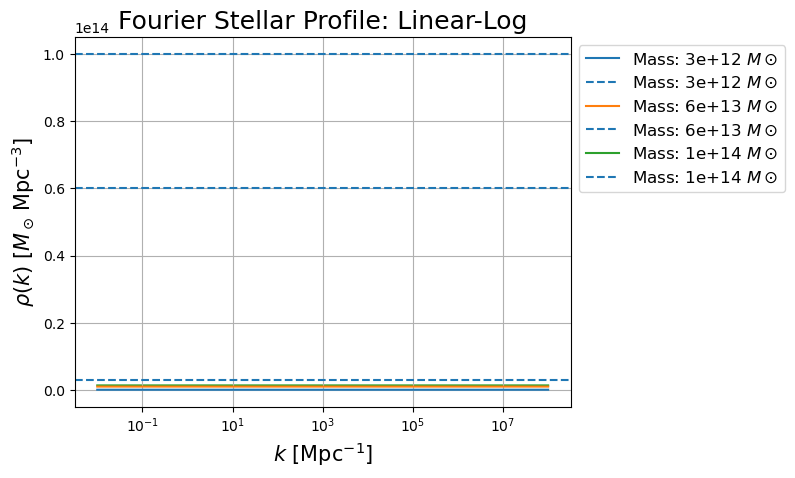

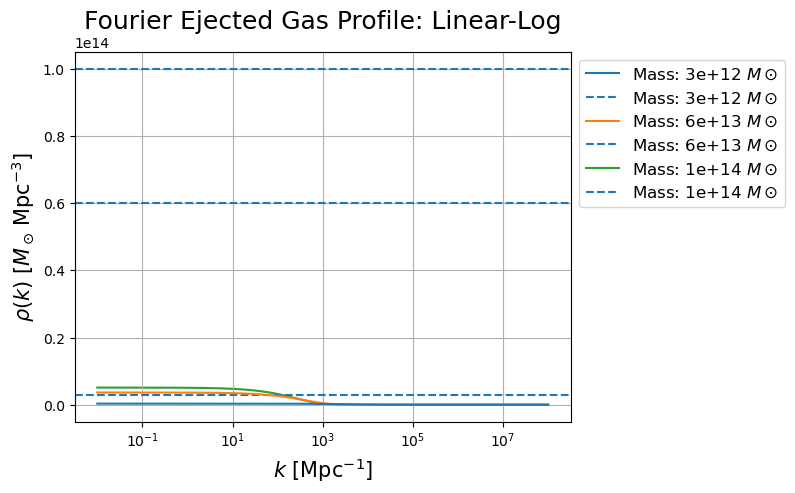

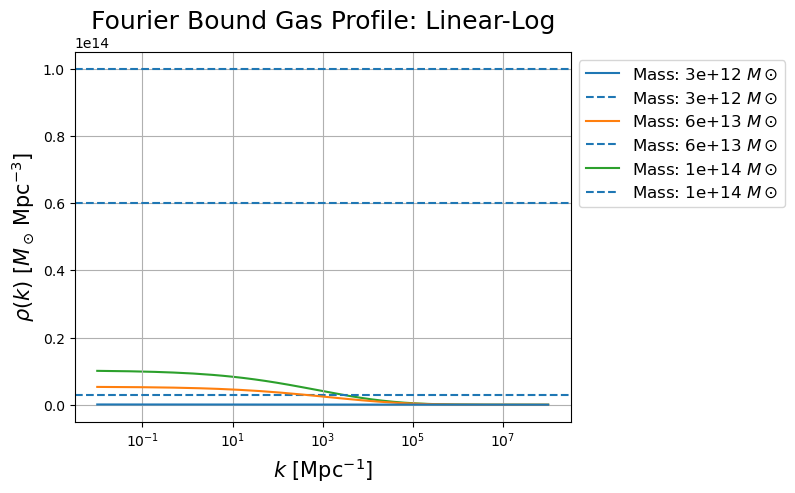

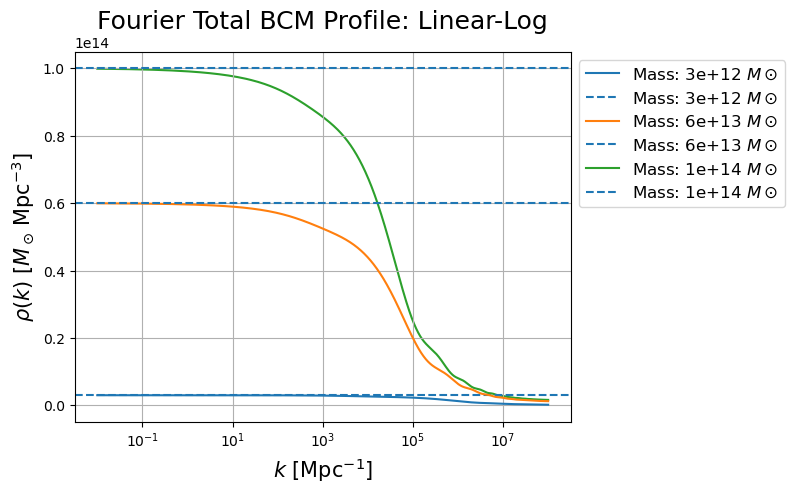

<Figure size 640x480 with 0 Axes>

In [108]:
bcm_fourier_profiles = [bcm_cdm_fourier, bcm_stel_fourier, bcm_ej_fourier, bcm_bd_fourier[0], bcm_fourier]
for i, profile in enumerate(bcm_fourier_profiles):
    for j, prof in enumerate(profile):
        plt.plot(trial_r, prof, label=f'Mass: {trial_M[j]:.1g} $M \\odot$', zorder=len(profile)-j)
        plt.axhline(trial_M[j], linestyle='--', label=f'Mass: {trial_M[j]:.1g} $M \\odot$')
    plt.xscale('log')
   # plt.yscale('log')
    plt.grid(True)
    plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=12)
    plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
    plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
    plt.title('Fourier'+titles_list[i]+'Profile: Linear-Log', fontsize=18);
    plt.figure();
    

## Fedeli

### Real

### Fourier

## BCM & Fedeli

### Real

### Fourier